<a href="https://colab.research.google.com/github/hayleypc/BPCA_HFF/blob/main/BPCA_analysis_plotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages(c('data.table','ggplot2','magrittr','rstatix','plotrix','ggsignif',"googledrive",'openxlsx','sf','ggpubr','forcats'))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘proxy’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘e1071’, ‘wk’, ‘corrplot’, ‘car’, ‘Rcpp’, ‘classInt’, ‘s2’, ‘units’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘gridExtra’, ‘polynom’




In [2]:
library(data.table)
library(ggplot2)
library(magrittr)
library(rstatix)
library(ggsignif)
library(plotrix)
library(googledrive)
library(openxlsx)
library(sf)
library(ggpubr)
library(forcats)


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE



In [3]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=27c454084eaa4eaee8653d06e276ebfa&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbXdzazI5NmJjVGViei1mZzA5a3J1cEU1M3BTaTc4SHRjbUltc1VpdFRhTUhBaHF5dVNqQ2doQ2VVcGRXb0JvQSIsInN0YXRlIjoiMjdjNDU0MDg0ZWFhNGVhZWU4NjUzZDA2ZTI3NmViZmEifQ==


In [4]:

# https://drive.google.com/file/d/1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv/view?usp=drive_link
drive_download(file = as_id('1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv'), path = '/content/firehistory_region_intersect.gpkg', overwrite = TRUE)

File downloaded:

• firehistory_region_intersect.gpkg <id: 1HlTOdV5IfKyUPac13dOoKbng7VKLvqVv>

Saved locally as:

• /content/firehistory_region_intersect.gpkg



In [5]:
# Coarse Woody Debris
# https://drive.google.com/file/d/1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0/view?usp=drive_link
drive_download(file = as_id('1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0'), path = '/content/cwd_rate_table.csv', overwrite = TRUE)

File downloaded:

• cwd_rate_table.csv <id: 1pXM6XIxxWL_Lsqyms1jtuuFcEHCjyLF0>

Saved locally as:

• /content/cwd_rate_table.csv



In [6]:
# LF fractionation
file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'full_bpca_exp_dt.csv']$id

drive_download(file = as_id(file_id), path = '/content/full_bpca_exp_dt.csv', overwrite = TRUE)

File downloaded:

• full_bpca_exp_dt.csv <id: 1664xblDUK5yG4zzhhXXomgwK-wR6p31b>

Saved locally as:

• /content/full_bpca_exp_dt.csv



In [7]:
# BPCA Standards
file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'standards.csv']$id

drive_download(file = as_id(file_id), path = '/content/standards.csv', overwrite = TRUE)

File downloaded:

• standards.csv <id: 1zNR-qpUKPnO6OpArQYuuweoMG505F7pw>

Saved locally as:

• /content/standards.csv



In [8]:
# Site level data
#https://drive.google.com/file/d/1jl5hrmDSY_4Fw6C7y0tXifYITMI7EzIh/view?usp=drive_link

file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == '2023_01_07_HFF_site_level.csv']$id

drive_download(file = as_id(file_id), path = '/content/2023_01_07_HFF_site_level.csv', overwrite = TRUE)

File downloaded:

• 2023_01_07_HFF_site_level.csv <id: 1jl5hrmDSY_4Fw6C7y0tXifYITMI7EzIh>

Saved locally as:

• /content/2023_01_07_HFF_site_level.csv



In [9]:
# Bulk Density

#https://drive.google.com/file/d/1qc7PMNOWeV-XAByKg157Ztvtnxj_7D35/view?usp=drive_link

file_id <- (drive_ls(path = as_id('1zi4l899vHE0cXpNpOkbafP3cmdkXhwKm')) %>% data.table)[name == 'HFF_soil_Db.csv']$id

drive_download(file = as_id(file_id), path = '/content/HFF_soil_Db.csv', overwrite = TRUE)

File downloaded:

• HFF_soil_Db.csv <id: 1qc7PMNOWeV-XAByKg157Ztvtnxj_7D35>

Saved locally as:

• /content/HFF_soil_Db.csv



In [10]:
cwd_rate_table <- fread('/content/cwd_rate_table.csv')

In [11]:
full_bpca_exp_dt <- fread('/content/full_bpca_exp_dt.csv')

In [12]:
sites_dt <- fread('/content/2023_01_07_HFF_site_level.csv')

In [13]:
stocks_dt <- fread('/content/HFF_soil_Db.csv')

In [14]:
firehist_dt <- st_read('/content/firehistory_region_intersect.gpkg') %>% as.data.table

Reading layer `firehistory_region_intersect' from data source 
  `/content/firehistory_region_intersect.gpkg' using driver `GPKG'
Simple feature collection with 2624 features and 25 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -122.2572 ymin: 44.20016 xmax: -122.2167 ymax: 44.22144
Geodetic CRS:  WGS 84


In [15]:
firehist_dt[,years_after:=2023-EPISODE]
events_dt <- firehist_dt[EPISODE>0,list(SITE=Site,fire_count=length(unique(EPISODE)),fire_frequency = mean(unique(years_after))/length(unique(years_after))),by=
  c('Site')]
  events_dt$Site <- NULL
# events_dt

In [16]:
full_bpca_exp_dt$V1 <- NULL

In [17]:
cwd_rate_table$V1 <- NULL
names(cwd_rate_table)[1] <- 'SITE'

In [18]:
full_bpca_exp_dt <- merge(full_bpca_exp_dt,stocks_dt[,c('SITE','DEPTH','BULKD')],by=c('SITE','DEPTH'))

In [19]:
full_bpca_exp_dt <- merge(full_bpca_exp_dt,cwd_rate_table,by=c('SITE'))

In [20]:
full_bpca_exp_dt <- merge(full_bpca_exp_dt,events_dt,by=c('SITE'),all.x = T)

In [21]:
full_bpca_exp_dt$FRACTION <- full_bpca_exp_dt$FRACTION  %>% factor(levels = c('LF','HF','BULK'))
full_bpca_exp_dt$DEPTH <- full_bpca_exp_dt$DEPTH  %>% factor(levels = c('0-5','5-10','10-20','20-30'))
full_bpca_exp_dt$BURN_SEVERITY <- full_bpca_exp_dt$BURN_SEVERITY  %>% factor(levels = c('control','low','moderate','high'))

In [22]:
full_bpca_exp_dt %>% names

[1] "SITE"                           "DEPTH"                         
 [3] "FRACTION"                       "BURN_SEVERITY"                 
 [5] "TREATMENT"                      "DEPTH_UPPER"                   
 [7] "DEPTH_LOWER"                    "CONC_240"                      
 [9] "CONC_216"                       "CONC_MEAN"                     
[11] "PEARSONS"                       "FRACTIONATION_MASS_RECOVERED_G"
[13] "STARTING_FRACT_MASS_SOIL_G"     "MASS_PROPORTION_RECOVERED"     
[15] "RECOVERY"                       "C_PERC"                        
[17] "N_PERC"                         "ACCEPT"                        
[19] "BPCA_STARTING_MASS_MG"          "BULKD"                         
[21] "decayed_mass_kg"                "total_input"                   
[23] "burn_decayed_mass_kg"           "wood_input_rate"               
[25] "wood_departure_rate"            "wood_accumulation_rate"        
[27] "years_to_capacity"              "years_to_recovery"             
[29] "fire_count"                     "fire_frequency"

In [23]:
full_bpca_exp_dt[3,][,.(CONC_MEAN,BPCA_STARTING_MASS_MG,C_PERC,MASS_PROPORTION_RECOVERED)]

CONC_MEAN,BPCA_STARTING_MASS_MG,C_PERC,MASS_PROPORTION_RECOVERED
<dbl>,<dbl>,<dbl>,<dbl>
0.05075127,3.961,22.17,0.215


In [24]:
full_bpca_exp_dt$DEPTH_UPPER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[1]}) %>% unlist %>% as.numeric
full_bpca_exp_dt$DEPTH_LOWER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[2]}) %>% unlist %>% as.numeric
full_bpca_exp_dt[,mg_ml_bpca := (CONC_MEAN/BPCA_STARTING_MASS_MG) ]
full_bpca_exp_dt[,g_kg_bpca_lf := MASS_PROPORTION_RECOVERED*mg_ml_bpca,by=1:nrow(full_bpca_exp_dt)]
#full_bpca_exp_dt[,g_PyC_kg_LF_C := (mg_ml_bpca/1000)/((C_PERC/100)*(1/1000)*MASS_PROPORTION_RECOVERED),by=1:nrow(full_bpca_exp_dt)]
# full_bpca_exp_dt[,g_PyC_kg_LF_C := (CONC_MEAN*BPCA_STARTING_MASS_MG/1000)/((C_PERC/100)*(1/1000)*MASS_PROPORTION_RECOVERED),by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,g_PyC_kg_LF_C := (CONC_MEAN*1000/BPCA_STARTING_MASS_MG)/(C_PERC/100),by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,g_PyC_kg_LF_C_soil := g_PyC_kg_LF_C*MASS_PROPORTION_RECOVERED,by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,per_bpca_carb_lf := mg_ml_bpca/(C_PERC/100),by=1:nrow(full_bpca_exp_dt)]
# full_bpca_exp_dt[,per_bpca_carb_lf := mg_ml_bpca/(C_PERC/100),by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,C_N := C_PERC/N_PERC,by=1:nrow(full_bpca_exp_dt)]
full_bpca_exp_dt[,carbon_stock:= (DEPTH_LOWER %>% as.numeric - DEPTH_UPPER%>% as.numeric )*((BULKD %>% as.numeric ))*(C_PERC/100)*100]
full_bpca_exp_dt[BURN_SEVERITY!='control',TREATMENT := 'treatment']
full_bpca_exp_dt[BURN_SEVERITY=='control',TREATMENT := 'control']
full_bpca_exp_dt[ ,TREATMENT := 'control']
full_bpca_exp_dt[,exp_group:= SITE %>% gsub('C','',.) %>% substr(1,1)]

In [66]:
#while(TRUE){}

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 295 rows containing non-finite values (`stat_bin()`).”


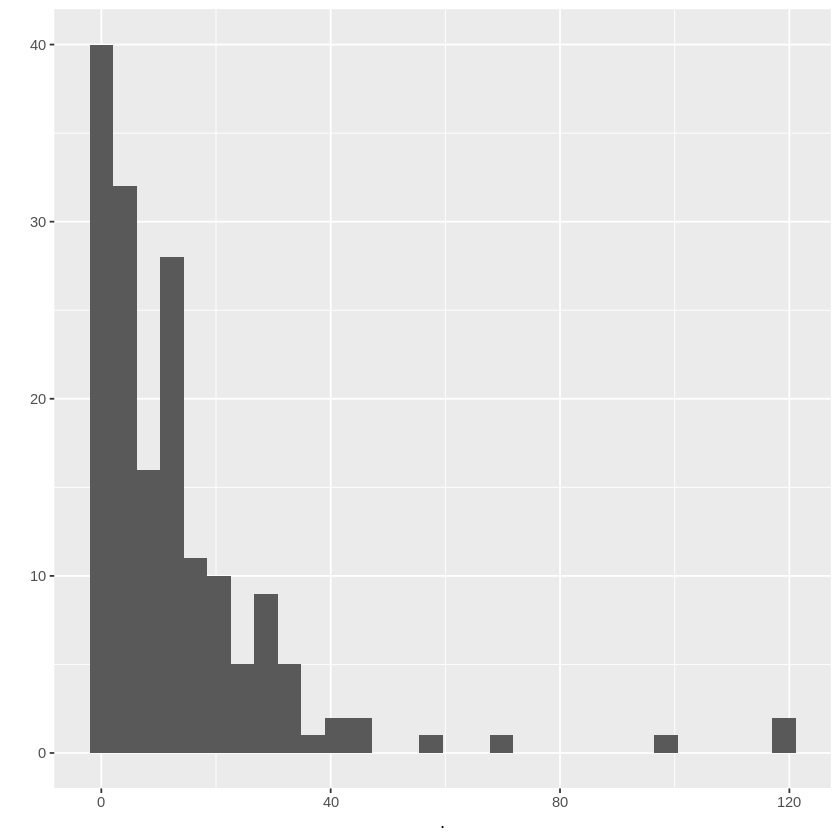

In [63]:
full_bpca_exp_dt$g_PyC_kg_LF_C_soil %>% qplot

In [26]:
analysis_full_bpca_exp_dt <-
full_bpca_exp_dt[ACCEPT =='T' &!is.na(DEPTH),list(
  CONC_MEAN=mean(CONC_MEAN,na.rm=T),
  C_PERC=mean(C_PERC,na.rm=T),
  N_PERC=mean(N_PERC,na.rm=T),
  C_N = mean(C_N,na.rm=T),
  mg_ml_bpca=mean(mg_ml_bpca,na.rm=T),
  g_kg_bpca_lf=mean(g_kg_bpca_lf,na.rm=T),
  g_PyC_kg_LF_C = mean(g_PyC_kg_LF_C,na.rm=T),
  per_bpca_carb_lf = mean(per_bpca_carb_lf,na.rm=T),
  carbon_stock = mean(carbon_stock,na.rm=T),
  MASS_PROPORTION_RECOVERED=mean(MASS_PROPORTION_RECOVERED,na.rm=T),
  decayed_mass_kg = mean(decayed_mass_kg,na.rm=T),
  total_input = mean(total_input,na.rm=T),
  burn_decayed_mass_kg = mean(burn_decayed_mass_kg,na.rm=T),
  wood_input_rate = mean(wood_input_rate,na.rm=T),
  wood_departure_rate = mean(wood_departure_rate,na.rm=T),
  wood_accumulation_rate = mean(wood_accumulation_rate,na.rm=T),
  years_to_capacity = mean(years_to_capacity,na.rm=T),
  years_to_recovery = mean(years_to_recovery,na.rm=T),
 fire_count = mean(fire_count,na.rm=T),
 fire_frequency = mean(fire_frequency,na.rm=T)
  # 'decayed_mass_kg''total_input''burn_decayed_mass_kg''wood_input_rate''wood_departure_rate''wood_accumulation_rate''years_to_capacity''years_to_recovery
  ),by=c('SITE','exp_group','FRACTION','DEPTH','BURN_SEVERITY','TREATMENT','DEPTH_UPPER','DEPTH_LOWER')]

In [65]:
analysis_full_bpca_exp_dt$BURN_SEVERITY %>% table

.
 control      low moderate     high 
     180       60       60       60 

In [28]:
names(analysis_full_bpca_exp_dt)

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "MASS_PROPORTION_RECOVERED"
[19] "decayed_mass_kg"           "total_input"              
[21] "burn_decayed_mass_kg"      "wood_input_rate"          
[23] "wood_departure_rate"       "wood_accumulation_rate"   
[25] "years_to_capacity"         "years_to_recovery"        
[27] "fire_count"                "fire_frequency"

In [29]:
t_tests_fractions_dt <-
c('HF','LF','BULK') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('C_N','C_PERC','N_PERC','carbon_stock') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac]


exp_dt$DEPTH %>% levels %>%
lapply(function(y){

# if( (length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2) &
#     (length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) ){
      # print((length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2))
      # print((length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) )
      # print(frac)
      # print(variable)
t_result <- t.test(control_dt[FRACTION == frac][DEPTH==y][[variable]] ,exp_dt[FRACTION == frac][DEPTH==y][[variable]] )
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=y,p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_group = group
          )
# }else(return(NULL))
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [30]:
t_tests_bpca_dt <-
c( 'LF') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf','g_PyC_kg_LF_C') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac]


exp_dt$DEPTH %>% levels %>%
lapply(function(y){

# if( (length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2) &
#     (length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) ){
      # print((length(!(control_dt[FRACTION == frac][DEPTH==y][[variable]]%>% is.na)) >2))
      # print((length(!(exp_dt[FRACTION == frac][DEPTH==y][[variable]] %>% is.na)) >2) )
      # print(frac)
      # print(variable)
t_result <- t.test(control_dt[FRACTION == frac][DEPTH==y][[variable]] ,exp_dt[FRACTION == frac][DEPTH==y][[variable]] )
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=y,p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_group = group
          )
# }else(return(NULL))
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [31]:
t_tests_dwd_dt <-
c('BULK') %>%
lapply(function(frac){
# ,'CONC_MEAN','mg_ml_bpca','g_kg_bpca_lf','per_bpca_carb_lf'
c('decayed_mass_kg','total_input','burn_decayed_mass_kg','wood_input_rate','wood_departure_rate','wood_accumulation_rate','years_to_capacity','years_to_recovery') %>%
lapply(function(variable){
c('H','M','L') %>%
lapply(function(group){
control_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY=='control'][FRACTION == frac]
exp_dt <- analysis_full_bpca_exp_dt[exp_group ==group][BURN_SEVERITY!='control'][FRACTION == frac]


(exp_dt$DEPTH %>% levels)[1] %>%
lapply(function(y){

t_result <- t.test(control_dt[FRACTION == frac][DEPTH==y][[variable]] ,exp_dt[FRACTION == frac][DEPTH==y][[variable]] )
data.table(fraction=frac,
          variable=variable,
          burn_severity = unique(exp_dt$burn_severity),
          depth=y,p=t_result$p.value,
          control_m = mean(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_sd = sd(control_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          control_n = length(control_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_m = mean(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_sd = sd(exp_dt[FRACTION == frac][DEPTH==y][[variable]],na.rm=T),
          exp_n = length(exp_dt[FRACTION == frac][DEPTH==y][[variable]] ),
          exp_group = group
          )

}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist
}) %>% rbindlist

In [32]:
t_tests_dwd_dt[variable=='burn_decayed_mass_kg']

fraction,variable,depth,p,control_m,control_sd,control_n,exp_m,exp_sd,exp_n,exp_group
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>
BULK,burn_decayed_mass_kg,0-5,0.14850514,6.764894,7.718483,5,0.5957299,0.5988446,5,H
BULK,burn_decayed_mass_kg,0-5,0.17175069,7.858705,7.483177,5,2.1485254,3.0556919,5,M
BULK,burn_decayed_mass_kg,0-5,0.03505987,7.990749,5.117360,5,0.9037810,0.9423704,5,L


In [33]:
t_tests_dt <- rbindlist(list(t_tests_fractions_dt,t_tests_bpca_dt,t_tests_dwd_dt))

In [34]:
# t_tests_dt[fraction =='BULK'][order(p)]

In [35]:
t_tests_dt[order(p)]

fraction,variable,depth,p,control_m,control_sd,control_n,exp_m,exp_sd,exp_n,exp_group
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<int>,<chr>
LF,mg_ml_bpca,20-30,0.02023523,0.03255684,0.01752042,5,0.004917858,0.008195251,5,L
LF,CONC_MEAN,20-30,0.02434420,0.11232476,0.06238620,5,0.018517911,0.030645164,5,L
BULK,total_input,0-5,0.03147256,17.27447231,9.63893845,5,3.654936930,5.401156521,5,L
LF,C_N,0-5,0.03225632,43.21267665,6.48059365,5,34.041555213,3.948036148,5,L
LF,N_PERC,0-5,0.03456137,0.63600000,0.04505552,5,0.808000000,0.125777581,5,L
BULK,wood_input_rate,0-5,0.03496690,0.65264690,0.31660494,5,0.205222617,0.218833264,5,L
BULK,burn_decayed_mass_kg,0-5,0.03505987,7.99074888,5.11735957,5,0.903781015,0.942370354,5,L
BULK,years_to_recovery,0-5,0.03588031,0.00000000,0.00000000,5,19.140095557,13.762665689,5,H
BULK,wood_accumulation_rate,0-5,0.03893278,0.37820114,0.17351290,5,0.137488116,0.125553803,5,L


In [36]:
t_tests_dt[,exp_m_norm := exp_m/control_m]

t_tests_dt[fraction!='BULK' & variable=='C_N'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction!='BULK' &variable=='C_PERC'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction!='BULK' &variable=='N_PERC'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction!='BULK' &variable=='carbon_stock'] %>%
aov(exp_m_norm ~ exp_group+depth+fraction, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='CONC_MEAN'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='mg_ml_bpca'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='g_kg_bpca_lf'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

t_tests_dt[fraction=='LF' &variable=='per_bpca_carb_lf'] %>%
aov(exp_m_norm ~ exp_group+depth, data = .) %>%
summary()

            Df Sum Sq Mean Sq F value Pr(>F)  
exp_group    2 0.4807  0.2403   2.766 0.0912 .
depth        3 0.3352  0.1117   1.286 0.3113  
fraction     1 0.0620  0.0620   0.713 0.4100  
Residuals   17 1.4773  0.0869                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.1459 0.07295   2.519  0.110
depth        3 0.1071 0.03571   1.233  0.328
fraction     1 0.0016 0.00161   0.055  0.817
Residuals   17 0.4923 0.02896               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.0577 0.02883   1.122  0.349
depth        3 0.0949 0.03164   1.232  0.329
fraction     1 0.0000 0.00003   0.001  0.973
Residuals   17 0.4367 0.02569               

            Df  Sum Sq Mean Sq F value Pr(>F)  
exp_group    2 0.10069 0.05035   2.842 0.0861 .
depth        3 0.01157 0.00386   0.218 0.8828  
fraction     1 0.00009 0.00009   0.005 0.9445  
Residuals   17 0.30111 0.01771                 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.2985 0.14927   1.995  0.217
depth        3 0.0693 0.02311   0.309  0.819
Residuals    6 0.4489 0.07481               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.3996 0.19981   2.812  0.138
depth        3 0.0986 0.03287   0.463  0.719
Residuals    6 0.4264 0.07106               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.0341 0.01706   0.181  0.838
depth        3 0.2079 0.06931   0.737  0.567
Residuals    6 0.5642 0.09403               

            Df Sum Sq Mean Sq F value Pr(>F)
exp_group    2 0.0711 0.03556   0.659  0.551
depth        3 0.1126 0.03752   0.695  0.588
Residuals    6 0.3239 0.05398               

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


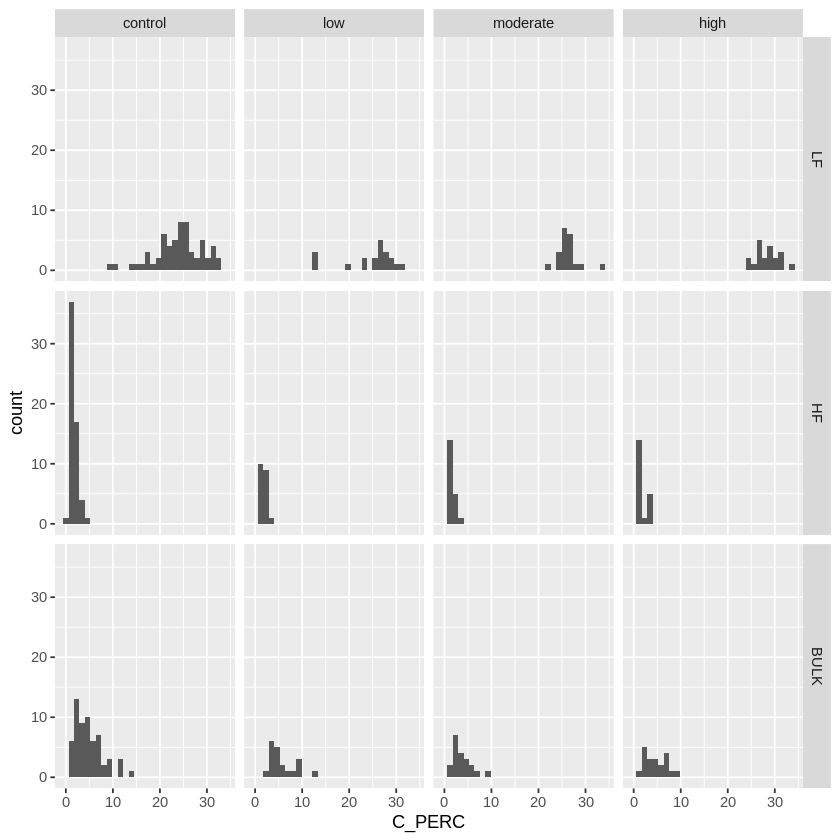

In [37]:
analysis_full_bpca_exp_dt%>%
  ggplot(aes(x=C_PERC))+
    geom_histogram()+
    facet_grid(FRACTION~BURN_SEVERITY)

In [38]:
new_labels <- c("0-5 cm", "5-10 cm", "10-20 cm", "20-30 cm")

# Replace levels in the DEPTH column
analysis_full_bpca_exp_dt[, DEPTH := factor(analysis_full_bpca_exp_dt$DEPTH,
                                            levels = levels(analysis_full_bpca_exp_dt$DEPTH),
                                            labels = new_labels)]



Standard curves

In [39]:
standards_dt <- fread('/content/standards.csv')

In [40]:
names(standards_dt)

[1] "V1"            "TREATMENT"     "FRACTION"      "DEPTH"        
 [5] "DEPTH_UPPER"   "DEPTH_LOWER"   "SITE"          "BURN_SEVERITY"
 [9] "PA_240_NM"     "PA_216_NM"     "CONC_240"      "CONC_216"     
[13] "CONC_MEAN"     "PEARSONS"

In [41]:
standards_dt[,facet_group := 'Experimental Data']
standards_dt[(TREATMENT %in% 'standard'),facet_group := 'Standards']

standards_dt[,dot_size :=.9]
standards_dt[(TREATMENT %in% 'standard'),dot_size :=1.0]


Call:
lm(formula = CONC_240 ~ CONC_216, data = .)

Residuals:
         1          2          3          4          5          6          7 
-0.0034751 -0.0034744 -0.0031517 -0.0017528 -0.0002361  0.0141387 -0.0020486 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.0002074  0.0029062   0.071    0.946    
CONC_216    0.9980875  0.0114844  86.908 3.82e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006947 on 5 degrees of freedom
Multiple R-squared:  0.9993,	Adjusted R-squared:  0.9992 
F-statistic:  7553 on 1 and 5 DF,  p-value: 3.823e-09



Call:
lm(formula = CONC_240 ~ CONC_216, data = .)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034267 -0.008184 -0.002559  0.004164  0.062476 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.001247   0.002433  -0.513    0.609    
CONC_216     1.058004   0.024426  43.314   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01656 on 125 degrees of freedom
  (6 observations deleted due to missingness)
Multiple R-squared:  0.9375,	Adjusted R-squared:  0.937 
F-statistic:  1876 on 1 and 125 DF,  p-value: < 2.2e-16


cor
<dbl>
0.9996692


cor
<dbl>
0.9682634


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 6 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 6 rows containing missing values (`geom_point()`).”


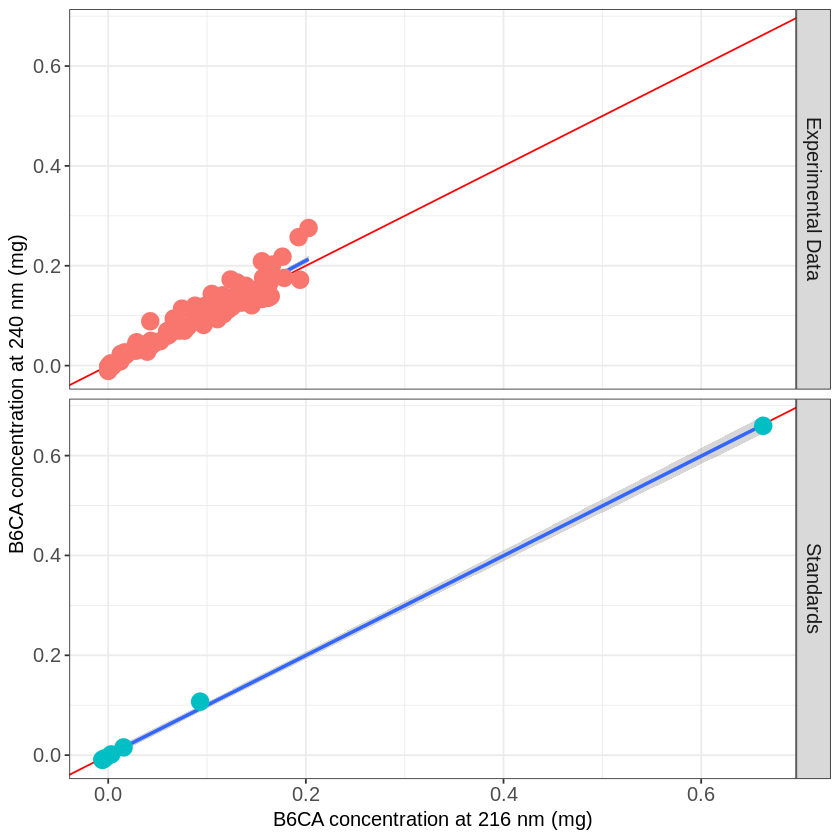

In [42]:
standards_dt[(TREATMENT %in% 'standard')] %>%
  lm(CONC_240~CONC_216,.) %>%
  summary()

standards_dt[!(TREATMENT %in% 'standard')] %>%
  lm(CONC_240~CONC_216,.) %>%
  summary()

standards_dt[(TREATMENT %in% 'standard'),][,list(cor=cor(CONC_240,CONC_216))]

standards_dt[!(TREATMENT %in% 'standard') &!is.na(CONC_240)&!is.na(CONC_216)][,list(cor=cor(CONC_240,CONC_216))]


standards_dt[ ] %>%
  ggplot(aes(x=CONC_216 ,y=CONC_240)) +

  geom_abline(color='red')+
  geom_smooth(method='lm')+
  geom_point(aes(color=facet_group, size = 0.25))+
  theme_bw()+
  theme(
    legend.position = "none",
    text = element_text(size = 12),
    axis.text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12)
  ) +
  ylab('B6CA concentration at 240 nm (mg)')+
  xlab('B6CA concentration at 216 nm (mg)')+

  facet_grid(facet_group~.)


Warning message:
“Removed 247 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 247 rows containing non-finite values (`stat_signif()`).”


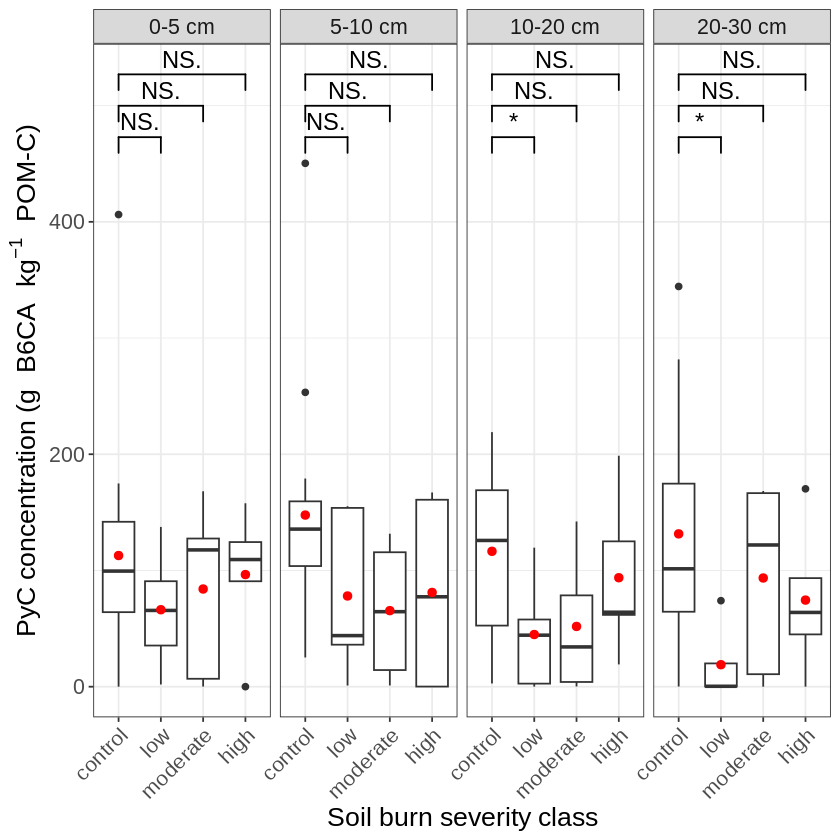

In [43]:

means_data <- analysis_full_bpca_exp_dt[, .(mean = mean(g_PyC_kg_LF_C, na.rm = TRUE)), by = .(BURN_SEVERITY, DEPTH)]

my_comparisons <- list(c(1, 2), c(1, 3), c(1, 4))

# Create the ggplot object with boxplots and means_data points
p <- ggplot(analysis_full_bpca_exp_dt, aes(x = BURN_SEVERITY, y = g_PyC_kg_LF_C)) +
  geom_boxplot() +
  geom_point(data = means_data, aes(y = mean), color = "red", size = 2) +
  facet_grid(. ~ DEPTH) +
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~'POM-C'*')')) +
  xlab('Soil burn severity class') +
  theme_bw() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1), text = element_text(size = 16))

# Add significance stars with adjusted vertical placement and size
p +
  geom_signif(comparisons = my_comparisons, map_signif_level = TRUE,textsize = 5, step_increase = 0.06)



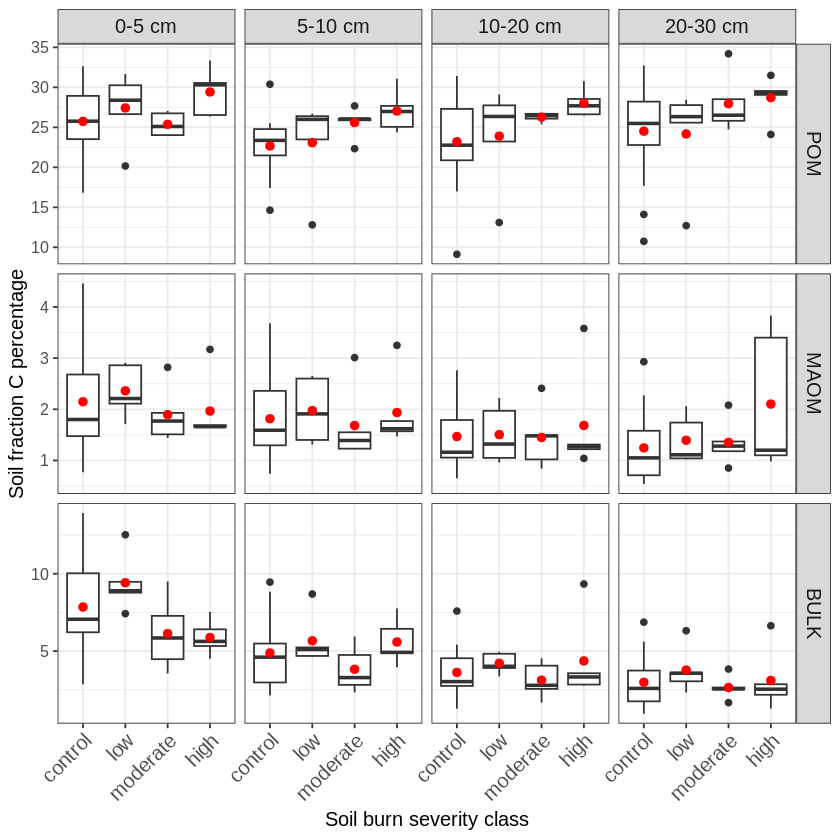

In [44]:
means_data <- analysis_full_bpca_exp_dt[ ,
                          .(C_PERC = mean(C_PERC, na.rm = TRUE)),
                          by = .(BURN_SEVERITY,FRACTION,DEPTH)]

analysis_full_bpca_exp_dt %>%
ggplot( aes(x = BURN_SEVERITY, y = C_PERC)) +
    geom_boxplot( ) +
    geom_point(data = means_data, aes(y = C_PERC), color = "red", size = 2) +
    # geom_signif(aes(),
    #         comparisons = list(c(1, 2), c(1, 3), c(1, 4)),
    #         map_signif_level = TRUE,
    #         textsize=2,
    #         step_increase = 0.05) +
    ylab('Soil fraction C percentage') +
    theme_bw()+
    xlab('Soil burn severity class') +
        theme(axis.text.x = element_text(angle = 45, hjust=1, size=12),
         text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12) )+
    facet_grid(FRACTION~DEPTH,scales = 'free_y', labeller = labeller(FRACTION = c("LF" = "POM", "HF" = "MAOM", "BULK" = "BULK")))

Warning message:
“Removed 247 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 247 rows containing non-finite values (`stat_signif()`).”


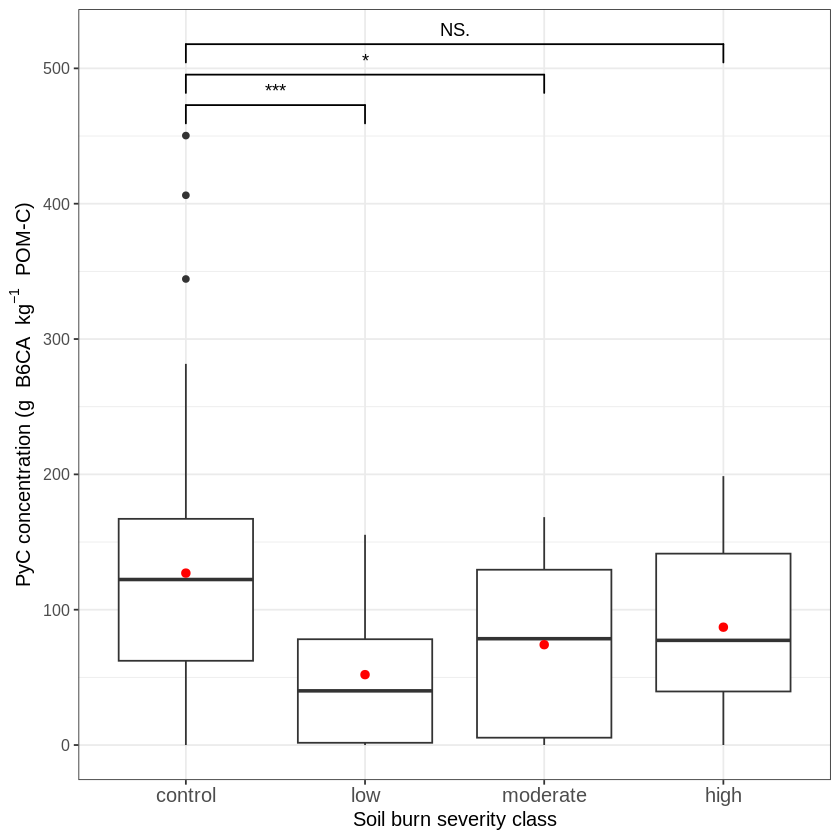

In [45]:
means_data <- analysis_full_bpca_exp_dt[ ,
                          .(mean = mean(g_PyC_kg_LF_C, na.rm = TRUE)),
                          by = .(BURN_SEVERITY)]

analysis_full_bpca_exp_dt %>%
ggplot( aes(x = BURN_SEVERITY, y = g_PyC_kg_LF_C)) +
    geom_boxplot( ) +
    geom_point(data = means_data, aes(y = mean), color = "red", size = 2) +
    geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
    theme_bw()+
      theme(axis.text.x = element_text(size=12),
         text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12) )+
    ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~'POM-C'*')'))+
    xlab('Soil burn severity class')


Warning message:
“Removed 247 rows containing non-finite values (`stat_signif()`).”


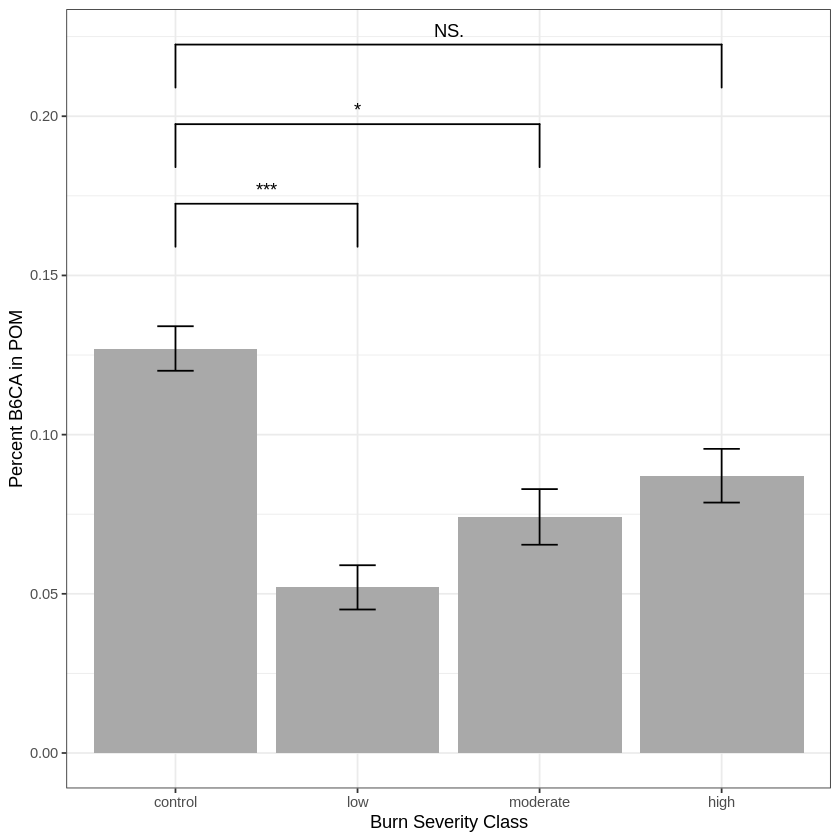

In [46]:
means_data <- analysis_full_bpca_exp_dt[, .(
  per_bpca_carb_lf = mean(per_bpca_carb_lf, na.rm = TRUE) ,
  SE = sd(per_bpca_carb_lf, na.rm = TRUE) / sqrt(.N)
), by = .(BURN_SEVERITY)]

analysis_full_bpca_exp_dt %>%
ggplot( aes(x = BURN_SEVERITY, y = per_bpca_carb_lf)) +
  geom_bar(data=means_data,stat = "identity", fill = "darkgrey") +
  geom_errorbar(data=means_data,
    aes(ymin = per_bpca_carb_lf - SE, ymax = per_bpca_carb_lf + SE),
    width = 0.2,
    position = position_dodge(0.9)
  ) +
  ylab('Percent B6CA in POM') +
  xlab('Burn Severity Class') +
  theme_bw() +
 geom_signif(data=analysis_full_bpca_exp_dt,y_position = c(.15, .175,.2),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE)
  #  geom_signif(
  #   comparisons = list(c("control", "low"), c("moderate", "high")),
  #   map_signif_level = TRUE,
  #   step_increase = 0.05,
  #   textsize = 4
  # )

In [47]:
names(analysis_full_bpca_exp_dt)

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "MASS_PROPORTION_RECOVERED"
[19] "decayed_mass_kg"           "total_input"              
[21] "burn_decayed_mass_kg"      "wood_input_rate"          
[23] "wood_departure_rate"       "wood_accumulation_rate"   
[25] "years_to_capacity"         "years_to_recovery"        
[27] "fire_count"                "fire_frequency"

Warning message:
“Removed 247 rows containing non-finite values (`stat_boxplot()`).”
Warning message:
“Removed 247 rows containing non-finite values (`stat_signif()`).”


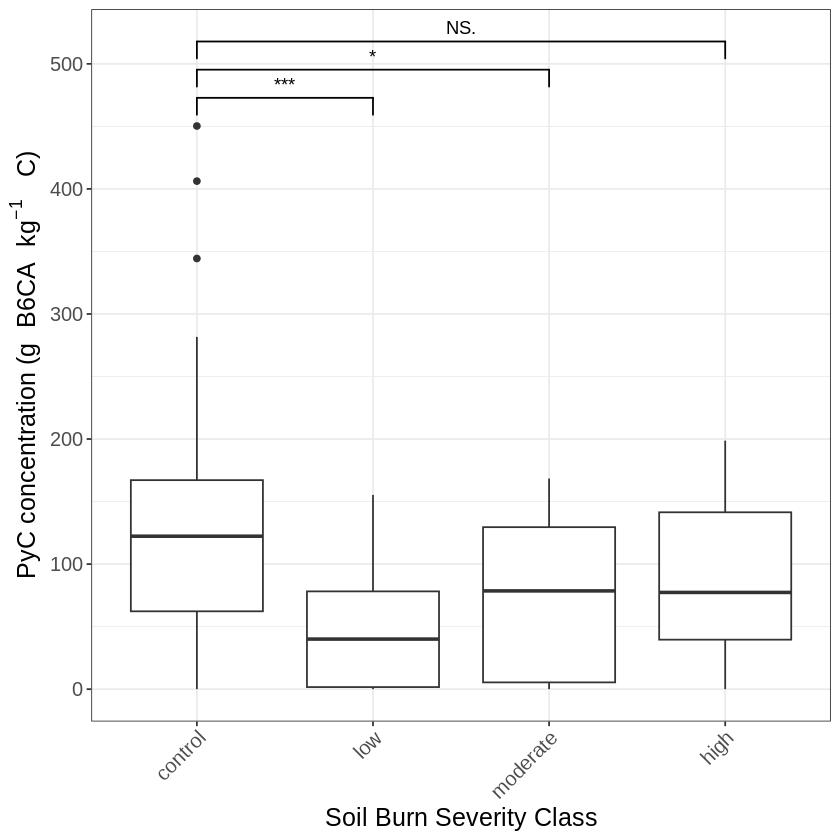

In [48]:
ggplot(analysis_full_bpca_exp_dt,aes(x = BURN_SEVERITY, y = g_PyC_kg_LF_C)) +
  geom_boxplot() +
  # geom_point(aes(y=group_mean),color='red')+
  #(bquote('Mean light fraction soil carbon content ('*mg~ 'C' ~g^-1~'soil'*')'))
  ylab(bquote('PyC concentration ('*g~ 'B6CA'~kg^-1~' C'*')'))+
  xlab('Soil Burn Severity Class') +
      theme_bw()+
      theme(text = element_text(size=15),axis.text.x = element_text(angle = 45, hjust=1)) +
  geom_signif(aes(),comparisons = list(c(1,2),c(1,3),c(1,4)),
            map_signif_level=TRUE,step_increase=.05) +
  # facet_grid(.~Depth) +
  coord_cartesian(expand=TRUE)

Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”
Warning message:
“Computation failed in `stat_signif()`
Caused by error in `if (scales$x$map(comp[1]) == data$group[1] | manual) ...`:
! missing value where TRUE/FALSE needed”


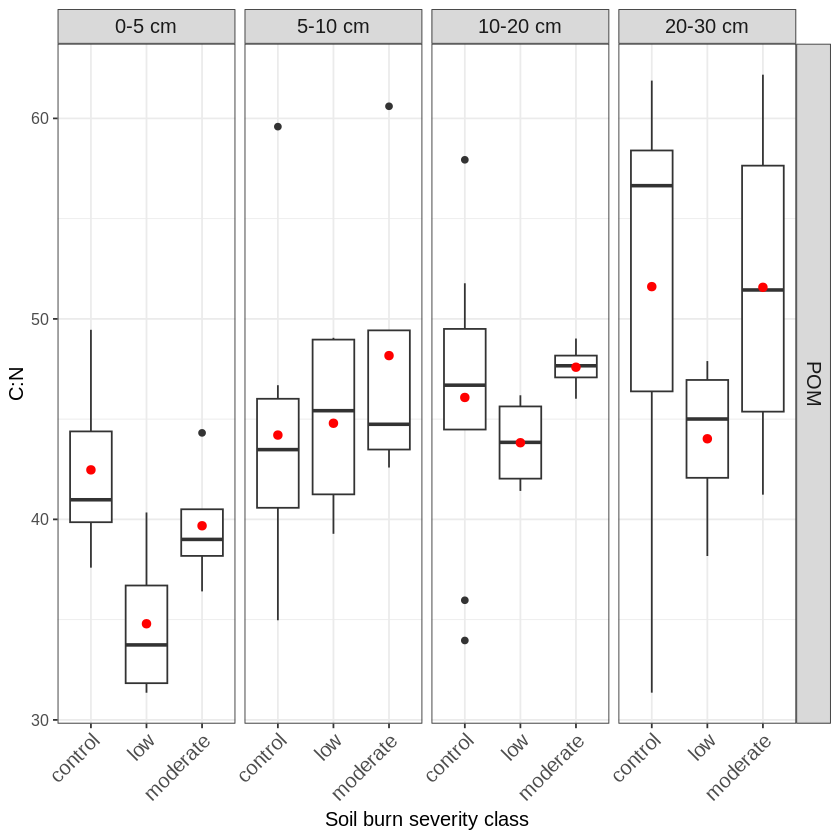

In [49]:


# Filter and clean data
cleaned_data <- analysis_full_bpca_exp_dt[complete.cases(analysis_full_bpca_exp_dt), ]
subset_data <- cleaned_data[cleaned_data$C_N < 200, ]

# Calculate means
means_data <- subset_data[, .(C_N = mean(C_N)), by = .(BURN_SEVERITY, FRACTION, DEPTH)]

# Calculate pairwise t-test p-values
depth_groups <- unique(subset_data$DEPTH)
significant_comparisons <- lapply(depth_groups, function(depth) {
  subgroup <- subset(subset_data, DEPTH == depth)
  p_values <- pairwise.t.test(subgroup$C_N, subgroup$BURN_SEVERITY)$p.value < 0.05
  return(p_values)
})

names(significant_comparisons) <- depth_groups

# Plot with significance stars for significant comparisons
ggplot(subset_data, aes(x = BURN_SEVERITY, y = C_N)) +
  geom_boxplot() +
  geom_point(data = means_data, aes(y = C_N), color = "red", size = 2) +
  ylab('C:N') +
  geom_signif(comparisons = significant_comparisons,
              map_signif_level = TRUE,
              step_increase = 0.05,
              textsize = 5) +  # Adjust text size as needed
  theme_bw() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
    text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12)
  ) +
  facet_grid(FRACTION ~ DEPTH, scales = 'free_y', labeller = labeller(FRACTION = c("LF" = "POM", "HF" = "MAOM", "BULK" = "BULK"))) +
  xlab('Soil burn severity class')





In [68]:
analysis_full_bpca_exp_dt %>% names

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "MASS_PROPORTION_RECOVERED"
[19] "decayed_mass_kg"           "total_input"              
[21] "burn_decayed_mass_kg"      "wood_input_rate"          
[23] "wood_departure_rate"       "wood_accumulation_rate"   
[25] "years_to_capacity"         "years_to_recovery"        
[27] "fire_count"                "fire_frequency"

Warning message in wilcox.test.default(c(12.2307692307692, 14.6315789473684, 13.0526315789474, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(12.2307692307692, 14.6315789473684, 13.0526315789474, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(12.2307692307692, 14.6315789473684, 13.0526315789474, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(12.0769230769231, 11.6666666666667, 6.75, :
“cannot compute exact p-value with ties”


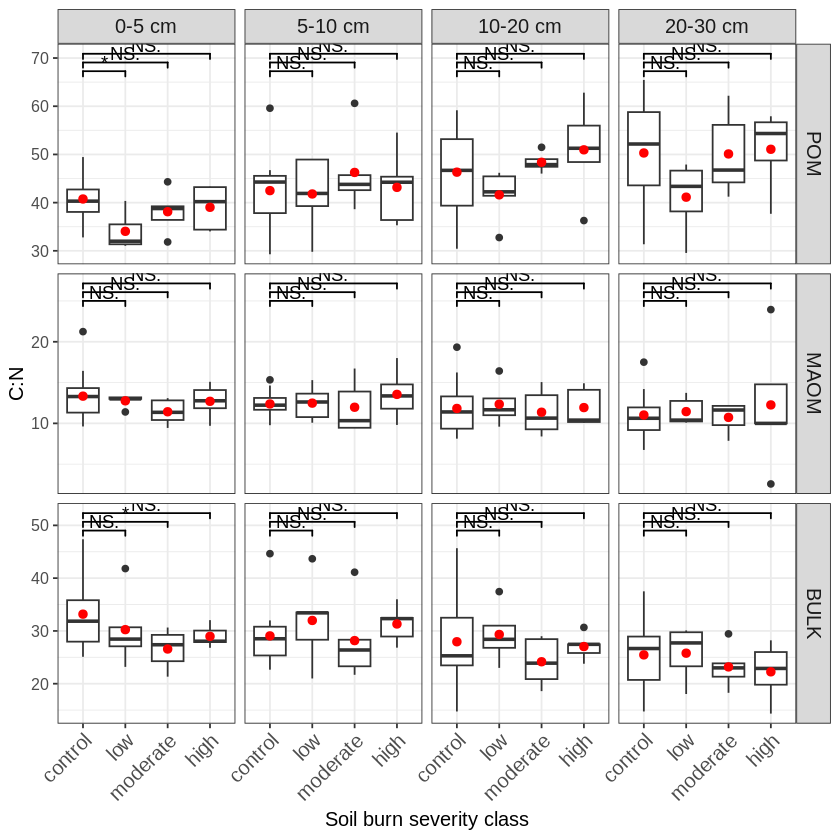

In [75]:
# Remove rows where C_N > 30 in HF fraction and C_N > 200 in LF fraction
cleaned_data <- analysis_full_bpca_exp_dt[!(FRACTION == 'HF' & C_N > 30) & !(FRACTION == 'LF' & C_N > 200)]

# Calculate means_data based on the cleaned dataset
means_data <- cleaned_data[C_N < 200,
                           .(C_N = mean(C_N, na.rm = TRUE)),
                           by = .(BURN_SEVERITY, FRACTION, DEPTH)]

# Create the plot using the cleaned data
cleaned_data %>%
  ggplot(aes(x = BURN_SEVERITY, y = C_N)) +
    geom_boxplot() +
    geom_point(data = means_data, aes(y = C_N), color = "red", size = 2) +
    ylab('C:N') +
    geom_signif(aes(), comparisons = list(c(1,2), c(1,3), c(1,4)),
                map_signif_level = TRUE, step_increase = 0.05) +
    theme_bw() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 12),
          text = element_text(size = 12),
          axis.title = element_text(size = 12),
          strip.text = element_text(size = 12)) +
    facet_grid(FRACTION ~ DEPTH, scales = 'free_y',
               labeller = labeller(FRACTION = c("LF" = "POM", "HF" = "MAOM", "BULK" = "BULK"))) +
    xlab('Soil burn severity class')




In [76]:
analysis_full_bpca_exp_dt %>% names

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "MASS_PROPORTION_RECOVERED"
[19] "decayed_mass_kg"           "total_input"              
[21] "burn_decayed_mass_kg"      "wood_input_rate"          
[23] "wood_departure_rate"       "wood_accumulation_rate"   
[25] "years_to_capacity"         "years_to_recovery"        
[27] "fire_count"                "fire_frequency"

In [90]:
selected_columns <- c("SITE", "FRACTION", "DEPTH", "carbon_stock",'BURN_SEVERITY')

filtered_data <- analysis_full_bpca_exp_dt[!is.nan(carbon_stock)]

# Summarize the data using data.table
summary_table <- filtered_data[, .(total_carbon_stock = sum(carbon_stock, na.rm = TRUE)),
                               by = .(SITE, FRACTION,BURN_SEVERITY)]

# Print the summary table
print(summary_table)

    SITE FRACTION BURN_SEVERITY total_carbon_stock
 1:  CH1     BULK       control            91.3665
 2:  CH1       HF       control            27.1650
 3:  CH1       LF       control           371.0630
 4:  CH2     BULK       control           114.2920
 5:  CH2       HF       control            34.5660
 6:  CH2       LF       control           247.7140
 7:  CH3     BULK       control            75.5660
 8:  CH3       HF       control            19.6980
 9:  CH3       LF       control           494.9640
10:  CH4     BULK       control            54.3505
11:  CH4       HF       control            28.5840
12:  CH4       LF       control           170.4740
13:  CH5     BULK       control            44.9160
14:  CH5       HF       control            10.8480
15:  CH5       LF       control           422.7615
16:  CL1     BULK       control            43.8050
17:  CL1       HF       control            16.5460
18:  CL1       LF       control           439.8935
19:  CL2     BULK       control

In [93]:
bulk_data <- summary_table[FRACTION == "BULK"]

anova_result <- aov(lm(total_carbon_stock ~ BURN_SEVERITY, data = summary_table))
print(anova_result)

tukey_result <- TukeyHSD(anova_result)
print(tukey_result)

Call:
   aov(formula = lm(total_carbon_stock ~ BURN_SEVERITY, data = summary_table))

Terms:
                BURN_SEVERITY Residuals
Sum of Squares           2644   1734293
Deg. of Freedom             3        86

Residual standard error: 142.0077
Estimated effects may be unbalanced
  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = lm(total_carbon_stock ~ BURN_SEVERITY, data = summary_table))

$BURN_SEVERITY
                       diff       lwr       upr     p adj
low-control       -4.644833 -115.5710 106.28138 0.9995239
moderate-control -11.365933 -122.2921  99.56028 0.9931834
high-control     -12.800667 -123.7269  98.12555 0.9903347
moderate-low      -6.721100 -142.5774 129.13521 0.9992162
high-low          -8.155833 -144.0121 127.70048 0.9986038
high-moderate     -1.434733 -137.2910 134.42158 0.9999923



In [95]:
# Perform Welch's ANOVA
welch_anova_result <- oneway.test(total_carbon_stock ~ BURN_SEVERITY, data = bulk_data, var.equal = FALSE)

# Print the Welch's ANOVA results
print(welch_anova_result)

# Perform Games-Howell post hoc test
games_howell_result <- pairwise.wilcox.test(bulk_data$total_carbon_stock, bulk_data$BURN_SEVERITY, p.adjust.method = "holm")

# Print the Games-Howell results
print(games_howell_result)


	One-way analysis of means (not assuming equal variances)

data:  total_carbon_stock and BURN_SEVERITY
F = 2.248, num df = 3.000, denom df = 10.467, p-value = 0.1426


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  bulk_data$total_carbon_stock and bulk_data$BURN_SEVERITY 

         control low  moderate
low      0.69    -    -       
moderate 0.57    0.19 -       
high     0.69    0.48 1.00    

P value adjustment method: holm 


In [78]:
summary_data[order(DEPTH) %>% rev, mean_carbon_stock_cum_sum := cumsum(mean_carbon_stock), by = .(BURN_SEVERITY, FRACTION)] %>% print

    BURN_SEVERITY FRACTION    DEPTH mean_carbon_stock se_carbon_stock
 1:       control     BULK   0-5 cm         13.976333       1.6400912
 2:       control       HF   0-5 cm          3.698933       0.4226102
 3:       control       LF   0-5 cm         45.648033       2.9780103
 4:       control     BULK 10-20 cm         16.640333       2.1948124
 5:       control       HF 10-20 cm          6.685533       0.8514847
 6:       control       LF 10-20 cm        105.687667       8.3204328
 7:       control     BULK 20-30 cm         16.930867       2.9328115
 8:       control       HF 20-30 cm          6.874800       1.0191091
 9:       control       LF 20-30 cm        136.327533      12.9046429
10:       control     BULK  5-10 cm          8.999200       1.2052485
11:       control       HF  5-10 cm          3.355833       0.4376645
12:       control       LF  5-10 cm         41.110233       1.8871748
13:          high     BULK   0-5 cm         10.195100       0.9416703
14:          high   

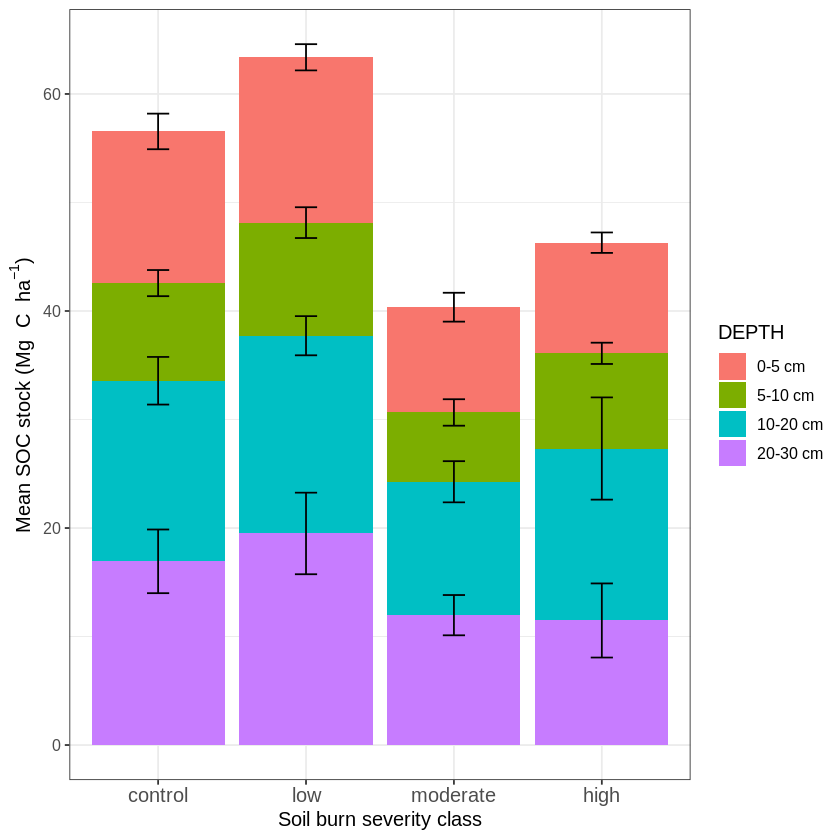

In [52]:
# Calculate means and standard errors
summary_data <- analysis_full_bpca_exp_dt[, .(
  mean_carbon_stock = mean(carbon_stock, na.rm = TRUE),
  se_carbon_stock = sd(carbon_stock, na.rm = TRUE) / sqrt(.N)  # Calculate standard error
), by = .(BURN_SEVERITY, FRACTION, DEPTH)]

summary_data[order(DEPTH) %>% rev, mean_carbon_stock_cum_sum := cumsum(mean_carbon_stock), by = .(BURN_SEVERITY, FRACTION)]

# Plot with standard error bars
bulk_data <- summary_data[FRACTION == 'BULK']

ggplot(bulk_data, aes(x = BURN_SEVERITY, y = mean_carbon_stock, fill = DEPTH)) +
  geom_bar(stat = "identity") +
  geom_errorbar(
    aes(ymin = mean_carbon_stock_cum_sum - se_carbon_stock, ymax = mean_carbon_stock_cum_sum + se_carbon_stock),
    width = 0.15
  ) +
  ylab(bquote('Mean SOC stock (' * Mg ~ 'C' ~ ha^-1 * ')')) +
  theme_bw() +
  theme(
    axis.text.x = element_text(size = 12),
    text = element_text(size = 12),
    axis.title = element_text(size = 12),
    strip.text = element_text(size = 12)
  ) +
  xlab('Soil burn severity class')


In [53]:
summary_data[order(DEPTH) %>% rev,mean_carbon_stock_cum_sum :=cumsum(mean_carbon_stock),by=.(BURN_SEVERITY,FRACTION)]

In [54]:
#model <- lm(bpca_conc_240_per * 1000 ~ count, data = events_dt) %>% print
#rsquared <- summary(model)$r.squared %>% print

In [55]:
analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &DEPTH =='0-5'] %>% names

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "MASS_PROPORTION_RECOVERED"
[19] "decayed_mass_kg"           "total_input"              
[21] "burn_decayed_mass_kg"      "wood_input_rate"          
[23] "wood_departure_rate"       "wood_accumulation_rate"   
[25] "years_to_capacity"         "years_to_recovery"        
[27] "fire_count"                "fire_frequency"

In [56]:
model <- lm(g_PyC_kg_LF_C ~ fire_count, data = analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2])%>% print
rsquared <- summary(model)$r.squared %>% print


Call:
lm(formula = g_PyC_kg_LF_C ~ fire_count, data = analysis_full_bpca_exp_dt[!is.na(fire_count) & 
    FRACTION == "LF" & !(DEPTH %in% c("0-5", "5-10")) & fire_count > 
    2])

Coefficients:
(Intercept)   fire_count  
     53.343        7.552  

[1] 0.01727227


In [57]:
# full_bpca_exp_dt$DEPTH_UPPER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[1]}) %>% unlist %>% as.numeric
# full_bpca_exp_dt$DEPTH_LOWER  <- full_bpca_exp_dt$DEPTH %>% paste0 %>% strsplit('-') %>% lapply(function(x){x[2]}) %>% unlist %>% as.numeric
# full_bpca_exp_dt[,mg_ml_bpca := (CONC_MEAN/BPCA_STARTING_MASS_MG) ]
# full_bpca_exp_dt[,g_kg_bpca_lf := MASS_PROPORTION_RECOVERED*mg_ml_bpca,by=1:nrow(full_bpca_exp_dt)]
# full_bpca_exp_dt[,per_bpca_carb_lf := mg_ml_bpca/(C_PERC/100),by=1:nrow(full_bpca_exp_dt)]
# full_bpca_exp_dt[,C_N := C_PERC/N_PERC,by=1:nrow(full_bpca_exp_dt)]
# full_bpca_exp_dt[,carbon_stock:= (DEPTH_LOWER %>% as.numeric - DEPTH_UPPER%>% as.numeric )*((BULKD %>% as.numeric ))*(C_PERC/100)*100]
# full_bpca_exp_dt[BURN_SEVERITY!='control',TREATMENT := 'treatment']
# full_bpca_exp_dt[BURN_SEVERITY=='control',TREATMENT := 'control']
# full_bpca_exp_dt[ ,TREATMENT := 'control']
# full_bpca_exp_dt[,exp_group:= SITE %>% gsub('C','',.) %>% substr(1,1)]

In [58]:
analysis_full_bpca_exp_dt %>% names

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "MASS_PROPORTION_RECOVERED"
[19] "decayed_mass_kg"           "total_input"              
[21] "burn_decayed_mass_kg"      "wood_input_rate"          
[23] "wood_departure_rate"       "wood_accumulation_rate"   
[25] "years_to_capacity"         "years_to_recovery"        
[27] "fire_count"                "fire_frequency"


Call:
lm(formula = fire_count ~ g_PyC_kg_LF_C, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.7394 -0.7195  0.1297  0.4853  2.4778 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   4.279198   0.869932   4.919 0.000354 ***
g_PyC_kg_LF_C 0.004270   0.009426   0.453 0.658600    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.255 on 12 degrees of freedom
  (2 observations deleted due to missingness)
Multiple R-squared:  0.01682,	Adjusted R-squared:  -0.06512 
F-statistic: 0.2052 on 1 and 12 DF,  p-value: 0.6586


`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing non-finite values (`stat_smooth()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_point()`).”


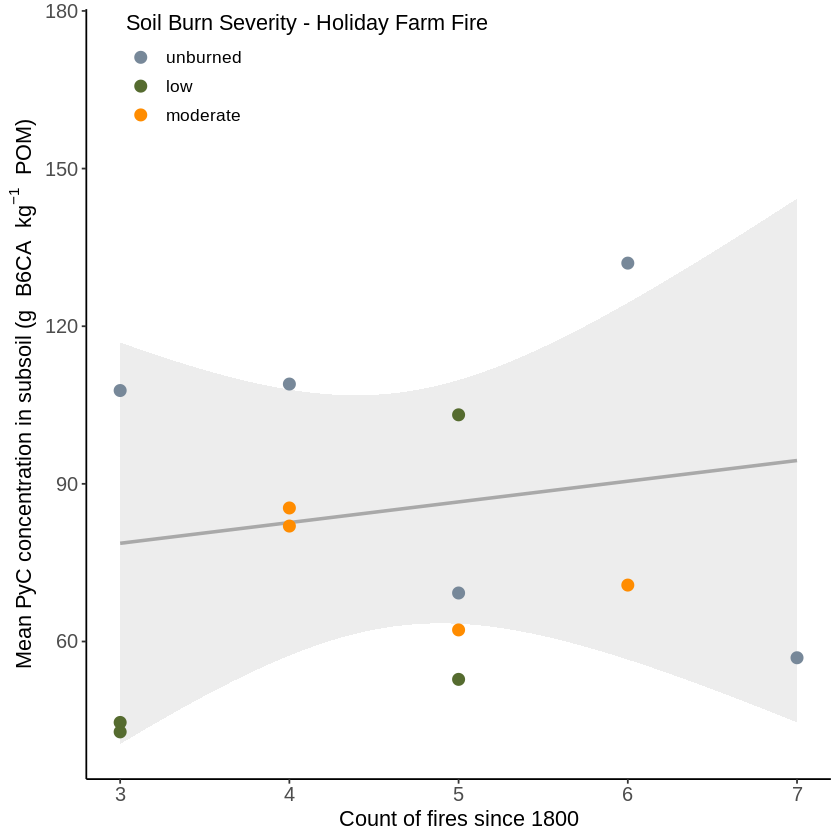

In [59]:
#'whitesmoke'
analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2][,list(g_PyC_kg_LF_C = mean(g_PyC_kg_LF_C)),by=.(SITE,fire_count,fire_frequency,BURN_SEVERITY)] %>%
  lm(fire_count~g_PyC_kg_LF_C,.) %>%
  summary()

analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2][,list(g_PyC_kg_LF_C = mean(g_PyC_kg_LF_C)),by=.(SITE,fire_count,fire_frequency,BURN_SEVERITY)] %>%
ggplot(aes(y = g_PyC_kg_LF_C, x = fire_count)) +
  geom_smooth(method = 'lm',
              se = TRUE,
              colour = 'darkgray',
              fill = 'lightgray') +
  geom_point(aes(color = BURN_SEVERITY), size = 3) +
  theme_classic() +
  theme(legend.position = c(.3, .92), text = element_text(size = 13),
        axis.text = element_text(size = 12)) +
  scale_color_manual(values = c('LightSlateGray', 'darkolivegreen', 'DarkOrange'),
                      name = 'Soil Burn Severity - Holiday Farm Fire',
                      labels = c('unburned', 'low', 'moderate')) +
   # ylab('Mean years to CWD capacity')       +
  #  ylab(bquote('Mean annual CWD accumulation rate ('*~kg ~ m ^-2~') '))       +
 # ylab(bquote('PyC concentration in POM (' * g ~ 'B6CA' ~ kg^-1 ~ 'C' * ')')) +
   ylab(bquote('Mean PyC concentration in subsoil ('* g ~ 'B6CA' ~ kg^-1 ~ 'POM'*')')) +
  xlab('Count of fires since 1800')

In [60]:
names(analysis_full_bpca_exp_dt)

[1] "SITE"                      "exp_group"                
 [3] "FRACTION"                  "DEPTH"                    
 [5] "BURN_SEVERITY"             "TREATMENT"                
 [7] "DEPTH_UPPER"               "DEPTH_LOWER"              
 [9] "CONC_MEAN"                 "C_PERC"                   
[11] "N_PERC"                    "C_N"                      
[13] "mg_ml_bpca"                "g_kg_bpca_lf"             
[15] "g_PyC_kg_LF_C"             "per_bpca_carb_lf"         
[17] "carbon_stock"              "MASS_PROPORTION_RECOVERED"
[19] "decayed_mass_kg"           "total_input"              
[21] "burn_decayed_mass_kg"      "wood_input_rate"          
[23] "wood_departure_rate"       "wood_accumulation_rate"   
[25] "years_to_capacity"         "years_to_recovery"        
[27] "fire_count"                "fire_frequency"


Call:
lm(formula = fire_frequency ~ wood_accumulation_rate, data = .)

Residuals:
      1       2       3       4       5       6       7 
 1.5919  2.5499  6.4854  0.4193  1.1271 -6.8323 -5.3414 

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)              77.500      3.689  21.008 4.53e-06 ***
wood_accumulation_rate  -37.813      6.729  -5.619  0.00247 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.055 on 5 degrees of freedom
Multiple R-squared:  0.8633,	Adjusted R-squared:  0.836 
F-statistic: 31.58 on 1 and 5 DF,  p-value: 0.00247


`geom_smooth()` using formula = 'y ~ x'


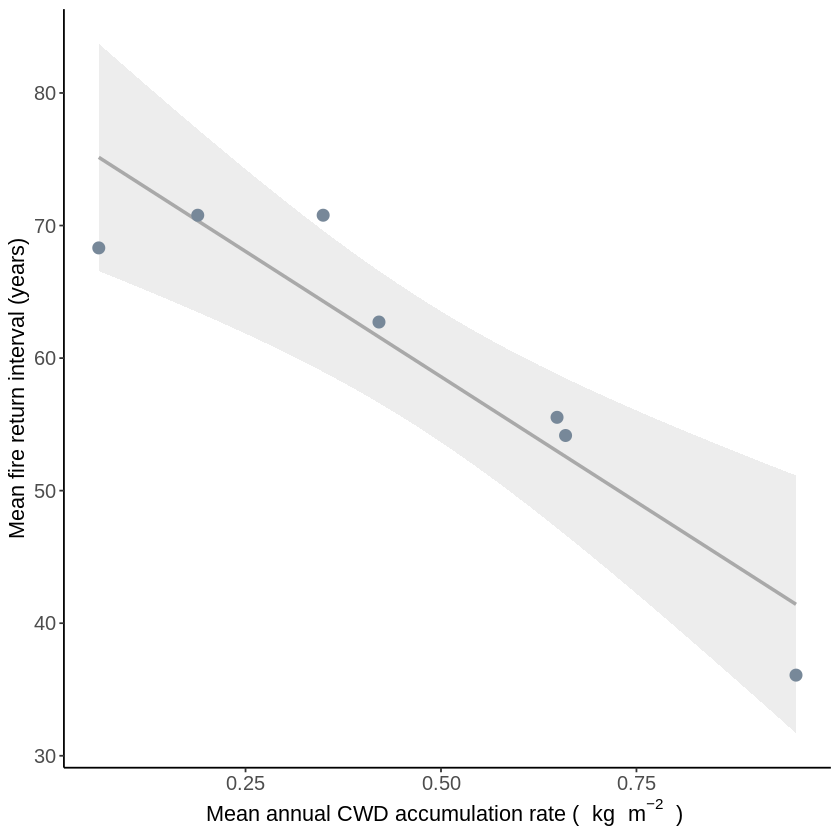

In [61]:

#'whitesmoke'
analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2&fire_frequency <100 &BURN_SEVERITY =='control'][,list(wood_accumulation_rate = mean(wood_accumulation_rate)),by=.(SITE,fire_count,fire_frequency,BURN_SEVERITY)] %>%
  lm(fire_frequency~wood_accumulation_rate,.) %>%
  summary()

analysis_full_bpca_exp_dt[!is.na(fire_count) &FRACTION =='LF' &!(DEPTH %in% c('0-5','5-10'))&fire_count>2 &fire_frequency <100&BURN_SEVERITY =='control'][,list(wood_accumulation_rate = mean(wood_accumulation_rate),C_N= mean(C_N)),by=.(SITE,fire_count,fire_frequency,BURN_SEVERITY)] %>%
ggplot(aes(x = wood_accumulation_rate, y = fire_frequency)) +
  geom_smooth(method = 'lm',
              se = TRUE,
              colour = 'darkgray',
              fill = 'lightgray') +
  geom_point(aes(color = BURN_SEVERITY), size = 3) +
  theme_classic() +
  theme(legend.position = "none",text = element_text(size = 13),
                         axis.text = element_text(size = 12)) +
  scale_color_manual(values = c('LightSlateGray', 'darkolivegreen', 'DarkOrange'),
                      name = 'Soil Burn Severity - Holiday Farm Fire',
                      labels = c('unburned', 'low', 'moderate')) +
   # ylab('Mean years to CWD capacity')       +
   xlab(bquote('Mean annual CWD accumulation rate ('*~kg ~ m ^-2~') '))       +
 # ylab(bquote('PyC concentration in POM (' * g ~ 'B6CA' ~ kg^-1 ~ 'C' * ')')) +
  # ylab(bquote('Mean PyC concentration in subsoil ('* g ~ 'B6CA' ~ kg^-1 ~ 'POM-C'*')')) +
  ylab('Mean fire return interval (years)')
